In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# importing necessary libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/ProjectForPaper/Dataset/covid_data.csv')

In [ ]:
df.head()

,tweet_id,created_at,text,loc,user_id,verified
0,1235681413485207552,2020-03-05 21:39:41+00:00,stayfrea alert corona virus spread through mon...,MI,u1,0
1,1235681419554213888,2020-03-05 21:39:42+00:00,matrodamusic corona virus temporary house musi...,UT,u2,0
2,1235681419558637568,2020-03-05 21:39:42+00:00,gainbos whole entire world corona virus danger...,TX,u3,0
3,1235681424809705472,2020-03-05 21:39:44+00:00,ellanjeferguson krystallsheree corona virus,MA,u4,0
4,1235681424809680896,2020-03-05 21:39:44+00:00,bradleoy corona virus said https wwfteavdch,NJ,u5,0


In [ ]:
df.shape

(7229508, 6)

In [ ]:
# taking frist 200k rows and drop remain rows
data=df.iloc[:20000,:]

In [ ]:
data.shape

(20000, 6)

# Text Preprocessing: Stemming, Stop-word removal and Lemmatization

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer 
stop = set(stopwords.words('english')) # set of stopwords in english
sno = nltk.stem.SnowballStemmer('english') # initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, ' ', sentence)
  return cleantext

def cleanpunc(sentence): # funciton to clean word of any punction or symbol
  cleaned = re.sub(r'[?|!|\'|"|#|*|_]',r'',sentence)
  cleaned = re.sub(r'[.|,|)|(|\|/]',r'',cleaned)
  return cleaned

In [ ]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase

text=' '
final_string=[]
s=''
for sent in data['text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower()))
                    filtered_sentence.append(s)
                    
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    text =" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(text)

In [ ]:
data['CleanedText']=final_string

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.head()

,tweet_id,created_at,text,loc,user_id,verified,CleanedText
0,1235681413485207552,2020-03-05 21:39:41+00:00,stayfrea alert corona virus spread through mon...,MI,u1,0,stayfrea alert corona virus spread money money...
1,1235681419554213888,2020-03-05 21:39:42+00:00,matrodamusic corona virus temporary house musi...,UT,u2,0,matrodamus corona virus temporari hous music f...
2,1235681419558637568,2020-03-05 21:39:42+00:00,gainbos whole entire world corona virus danger...,TX,u3,0,gainbo whole entir world corona virus danger j...
3,1235681424809705472,2020-03-05 21:39:44+00:00,ellanjeferguson krystallsheree corona virus,MA,u4,0,ellanjeferguson krystallshere corona virus
4,1235681424809680896,2020-03-05 21:39:44+00:00,bradleoy corona virus said https wwfteavdch,NJ,u5,0,bradleoy corona virus said https wwfteavdch


In [ ]:
# importing libries for sentiment analysis
from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
# Create a function to get subjectivity and polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new ccolumns

data['Subjectivity']=data['CleanedText'].apply(getSubjectivity)
data['Polarity']=data['CleanedText'].apply(getPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
# Create function to compute the negative ,neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
data['Analysis']=data['Polarity'].apply(getAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data.head()

,tweet_id,created_at,text,loc,user_id,verified,CleanedText,Subjectivity,Polarity,Analysis
0,1235681413485207552,2020-03-05 21:39:41+00:00,stayfrea alert corona virus spread through mon...,MI,u1,0,stayfrea alert corona virus spread money money...,0.0,0.0,Neutral
1,1235681419554213888,2020-03-05 21:39:42+00:00,matrodamusic corona virus temporary house musi...,UT,u2,0,matrodamus corona virus temporari hous music f...,0.0,0.0,Neutral
2,1235681419558637568,2020-03-05 21:39:42+00:00,gainbos whole entire world corona virus danger...,TX,u3,0,gainbo whole entir world corona virus danger j...,0.4,0.2,Positive
3,1235681424809705472,2020-03-05 21:39:44+00:00,ellanjeferguson krystallsheree corona virus,MA,u4,0,ellanjeferguson krystallshere corona virus,0.0,0.0,Neutral
4,1235681424809680896,2020-03-05 21:39:44+00:00,bradleoy corona virus said https wwfteavdch,NJ,u5,0,bradleoy corona virus said https wwfteavdch,0.0,0.0,Neutral


In [ ]:
data.columns

Index(['tweet_id', 'created_at', 'text', 'loc', 'user_id', 'verified',
       'CleanedText', 'Subjectivity', 'Polarity', 'Analysis'],
      dtype='object')

In [ ]:
#finding unique locations

locations = pd.Series(data['loc'].tolist())
unique_loc = len(np.unique(locations))
print('Number of unique Location: ',unique_loc)

Number of unique Location:  50


In [ ]:
print ('Maximum number of times a single location is repeated: {}\n'.format(max(locations.value_counts())))

Maximum number of times a single location is repeated: 3399



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


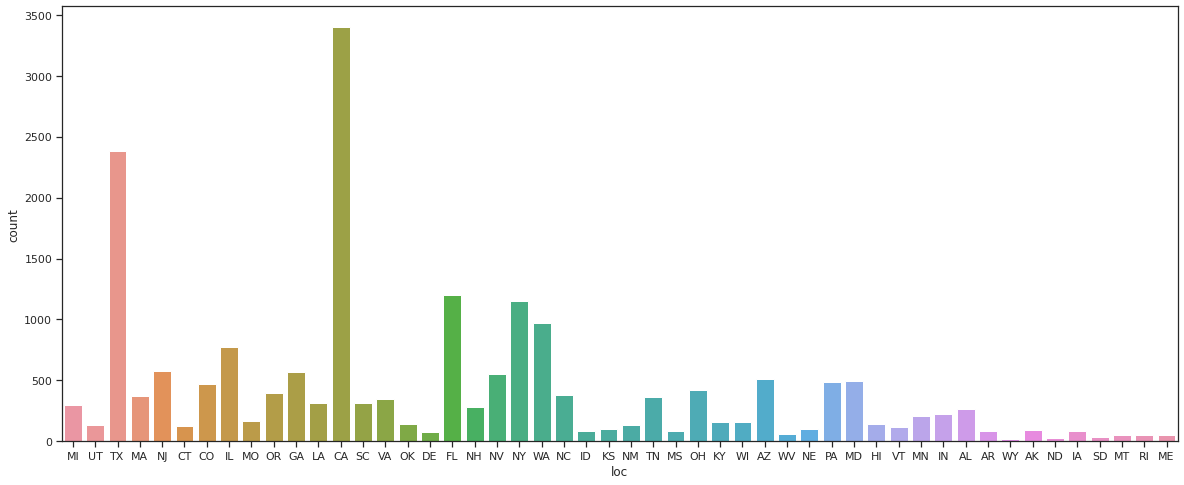

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data['loc'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


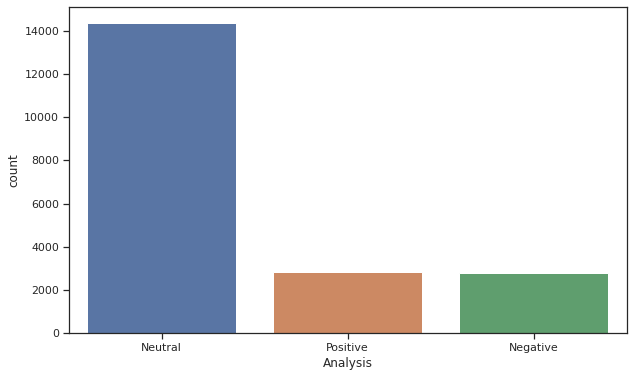

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['Analysis'])

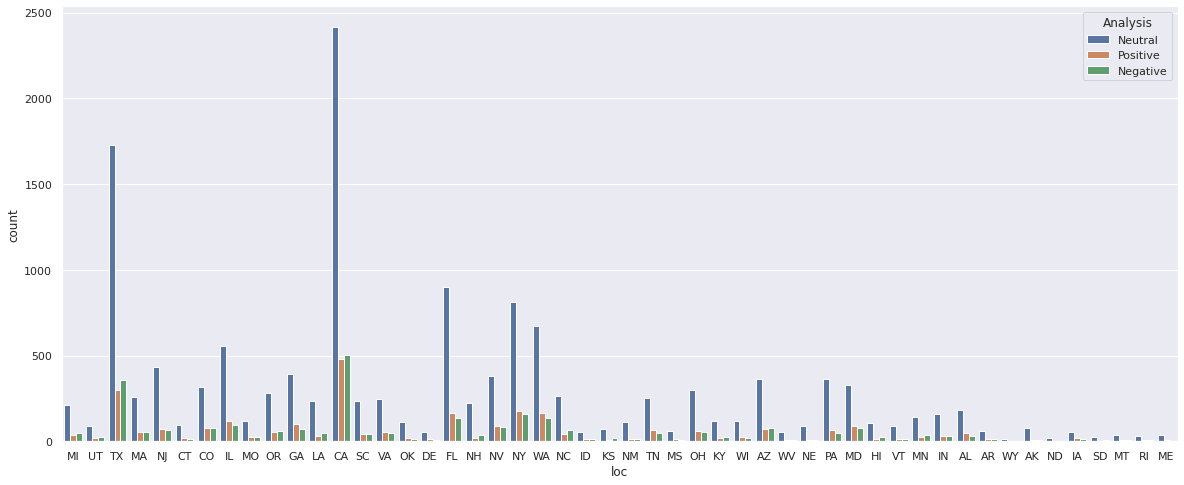

In [ ]:
plt.figure(figsize=(20,8))
# count plot between location and Sentiment
sns.countplot(x ='loc', hue = "Analysis", data = data) 

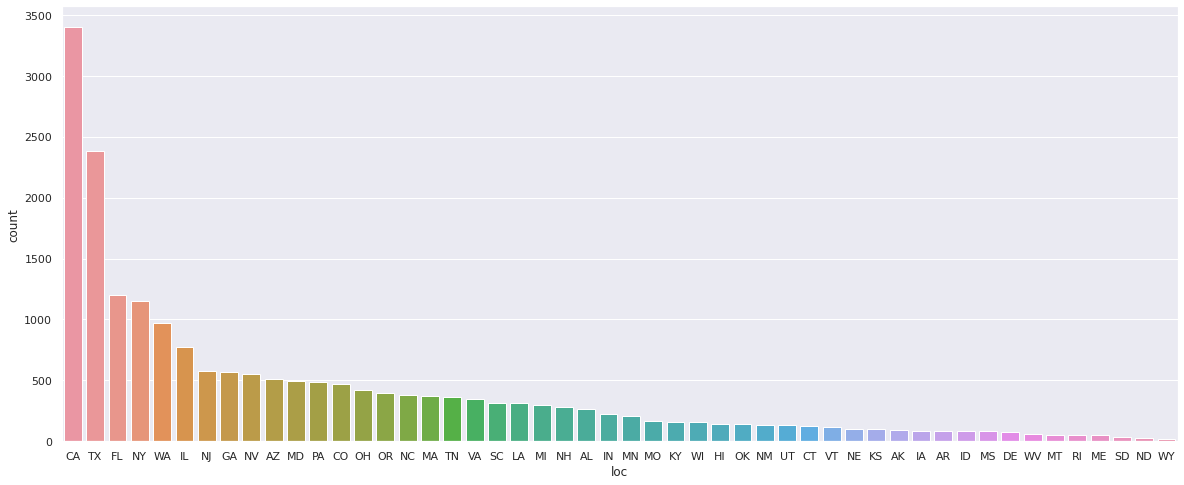

In [ ]:
# plot according to most frequent order
plt.figure(figsize=(20,8))
sns.set(style='darkgrid')
sns.countplot(x = 'loc',
              data = data,
              order = data['loc'].value_counts().index)
plt.show()

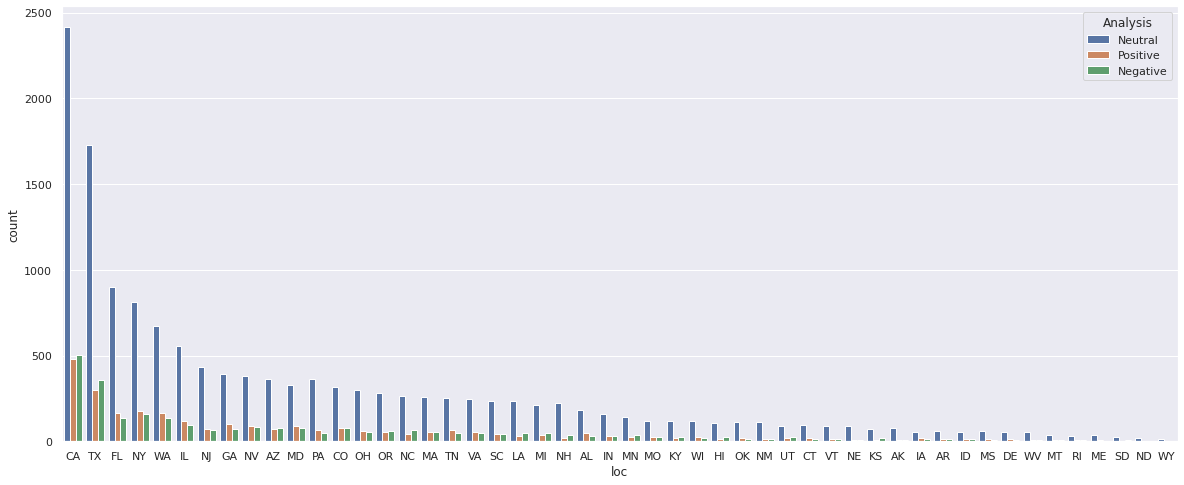

In [ ]:
plt.figure(figsize=(20,8))
sns.set(style='darkgrid')
sns.countplot(x = 'loc',
              hue = 'Analysis',
              data = data,
              order = data['loc'].value_counts().index)
plt.show()

# Convert into numeric value using label encoder
```

```



In [ ]:
# copy the dataset

copy_data = data.copy()

In [ ]:
copy_data

,tweet_id,created_at,text,loc,user_id,verified,CleanedText,Subjectivity,Polarity,Analysis
0,1235681413485207552,2020-03-05 21:39:41+00:00,stayfrea alert corona virus spread through mon...,MI,u1,0,stayfrea alert corona virus spread money money...,0.000000,0.000000,Neutral
1,1235681419554213888,2020-03-05 21:39:42+00:00,matrodamusic corona virus temporary house musi...,UT,u2,0,matrodamus corona virus temporari hous music f...,0.000000,0.000000,Neutral
2,1235681419558637568,2020-03-05 21:39:42+00:00,gainbos whole entire world corona virus danger...,TX,u3,0,gainbo whole entir world corona virus danger j...,0.400000,0.200000,Positive
3,1235681424809705472,2020-03-05 21:39:44+00:00,ellanjeferguson krystallsheree corona virus,MA,u4,0,ellanjeferguson krystallshere corona virus,0.000000,0.000000,Neutral
4,1235681424809680896,2020-03-05 21:39:44+00:00,bradleoy corona virus said https wwfteavdch,NJ,u5,0,bradleoy corona virus said https wwfteavdch,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...
19995,1235957820450840579,2020-03-06 15:58:02+00:00,krfinley coughing fever shortness breath coron...,NY,u18499,0,krfinley cough fever short breath corona sympt...,0.450000,0.350000,Positive
19996,1235957824016039936,2020-03-06 15:58:02+00:00,mikel_jollett this deadly serious talking abou...,OH,u18500,0,mikeljollett dead serious talk coronavirus mor...,0.533333,-0.266667,Negative
19997,1235957833419460609,2020-03-06 15:58:05+00:00,mikel_jollett this deadly serious talking abou...,CO,u18501,0,mikeljollett dead serious talk coronavirus mor...,0.533333,-0.266667,Negative
19998,1235957839924875264,2020-03-06 15:58:06+00:00,mikel_jollett this deadly serious talking abou...,CA,u18502,0,mikeljollett dead serious talk coronavirus mor...,0.533333,-0.266667,Negative


In [ ]:
copy_data.columns

Index(['tweet_id', 'created_at', 'text', 'loc', 'user_id', 'verified',
       'CleanedText', 'Subjectivity', 'Polarity', 'Analysis'],
      dtype='object')

In [ ]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      20000 non-null  int64  
 1   created_at    20000 non-null  object 
 2   text          20000 non-null  object 
 3   loc           20000 non-null  object 
 4   user_id       20000 non-null  object 
 5   verified      20000 non-null  int64  
 6   CleanedText   20000 non-null  object 
 7   Subjectivity  20000 non-null  float64
 8   Polarity      20000 non-null  float64
 9   Analysis      20000 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.5+ MB


In [ ]:
copy_data.drop(['tweet_id','created_at','text','user_id','verified','CleanedText','Subjectivity','Polarity'],axis=1,inplace=True)

In [ ]:
copy_data

,loc,Analysis
0,MI,Neutral
1,UT,Neutral
2,TX,Positive
3,MA,Neutral
4,NJ,Neutral
...,...,...
19995,NY,Positive
19996,OH,Negative
19997,CO,Negative
19998,CA,Negative


In [ ]:
copy_data.head()

,loc,Analysis
0,MI,Neutral
1,UT,Neutral
2,TX,Positive
3,MA,Neutral
4,NJ,Neutral


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


In [ ]:
copy_data.head()

,loc,Analysis,loc_encoder,analysis_encoder
0,MI,Neutral,21,1
1,UT,Neutral,43,1
2,TX,Positive,42,2
3,MA,Neutral,18,1
4,NJ,Neutral,30,1


In [ ]:
le = LabelEncoder()

In [ ]:
le.fit_transform(copy_data['loc'])

array([21, 43, 42, ...,  5,  4, 32])

In [ ]:
copy_data['loc_encoder']=le.fit_transform(copy_data['loc'])

In [ ]:
copy_data['loc_encoder'].value_counts()

4     3399
42    2379
8     1200
33    1151
46     974
13     774
30     578
9      566
32     554
3      515
19     494
37     484
5      474
34     417
36     397
26     376
18     370
41     365
44     350
39     316
17     314
21     298
29     278
1      262
14     220
22     204
23     166
16     161
47     157
10     146
35     142
31     136
43     131
6      127
45     119
28     104
15     101
0       93
11      87
2       85
12      83
24      82
7       79
48      64
25      50
38      50
20      50
40      37
27      24
49      17
Name: loc_encoder, dtype: int64

In [ ]:
copy_data['analysis_encoder']=le.fit_transform(copy_data['Analysis'])

In [ ]:
copy_data.head()

,loc,Analysis,loc_encoder,analysis_encoder
0,MI,Neutral,21,1
1,UT,Neutral,43,1
2,TX,Positive,42,2
3,MA,Neutral,18,1
4,NJ,Neutral,30,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


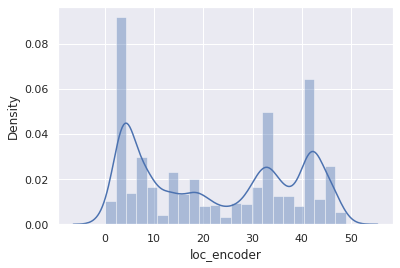

In [ ]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
x = copy_data['loc_encoder']
ax = sns.distplot(x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


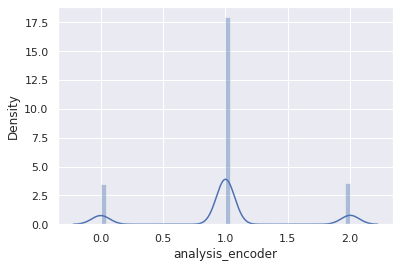

In [ ]:
sns.set_theme(); np.random.seed(0)
y = copy_data['analysis_encoder']
ax = sns.distplot(y)

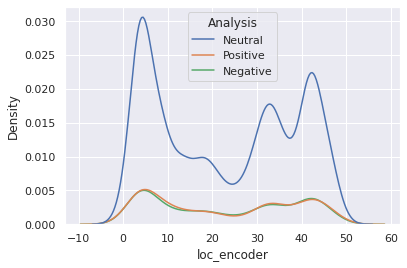

In [ ]:
sns.kdeplot(data=copy_data, x="loc_encoder", hue="Analysis")

<Figure size 1440x576 with 0 Axes>

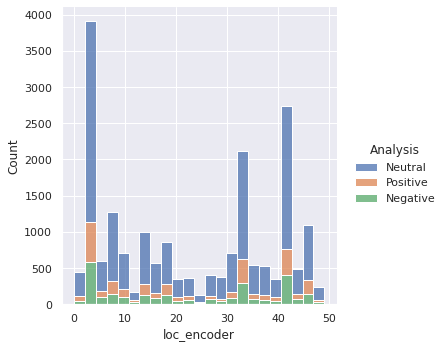

In [ ]:
plt.figure(figsize=(20,8))
sns.displot(copy_data, x="loc_encoder", hue="Analysis", multiple="stack")

# Finding correlation

In [ ]:
copy_data.corr()

,loc_encoder,analysis_encoder
loc_encoder,1.000000,-0.003111
analysis_encoder,-0.003111,1.000000


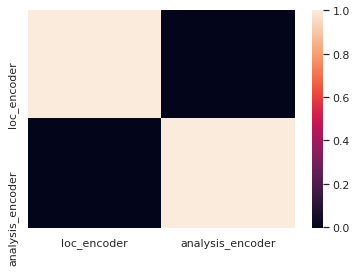

In [ ]:
sns.heatmap(copy_data.corr())

In [ ]:
df2 = data.copy()

In [ ]:
df2.head()

,tweet_id,created_at,text,loc,user_id,verified,CleanedText,Subjectivity,Polarity,Analysis
0,1235681413485207552,2020-03-05 21:39:41+00:00,stayfrea alert corona virus spread through mon...,MI,u1,0,stayfrea alert corona virus spread money money...,0.0,0.0,Neutral
1,1235681419554213888,2020-03-05 21:39:42+00:00,matrodamusic corona virus temporary house musi...,UT,u2,0,matrodamus corona virus temporari hous music f...,0.0,0.0,Neutral
2,1235681419558637568,2020-03-05 21:39:42+00:00,gainbos whole entire world corona virus danger...,TX,u3,0,gainbo whole entir world corona virus danger j...,0.4,0.2,Positive
3,1235681424809705472,2020-03-05 21:39:44+00:00,ellanjeferguson krystallsheree corona virus,MA,u4,0,ellanjeferguson krystallshere corona virus,0.0,0.0,Neutral
4,1235681424809680896,2020-03-05 21:39:44+00:00,bradleoy corona virus said https wwfteavdch,NJ,u5,0,bradleoy corona virus said https wwfteavdch,0.0,0.0,Neutral


In [ ]:
df2.columns

Index(['tweet_id', 'created_at', 'text', 'loc', 'user_id', 'verified',
       'CleanedText', 'Subjectivity', 'Polarity', 'Analysis'],
      dtype='object')

In [ ]:
df2.drop(['tweet_id','created_at','user_id','verified','text','CleanedText'],axis=1,inplace=True)

In [ ]:
df2.head()

,loc,Subjectivity,Polarity,Analysis
0,MI,0.0,0.0,Neutral
1,UT,0.0,0.0,Neutral
2,TX,0.4,0.2,Positive
3,MA,0.0,0.0,Neutral
4,NJ,0.0,0.0,Neutral


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [ ]:
lel = LabelEncoder()

In [ ]:
df2['loc_encoder']=le.fit_transform(df2['loc'])


In [ ]:
df2['analysis_encoder']=le.fit_transform(df2['Analysis'])

In [ ]:
df2.head()

,loc,Subjectivity,Polarity,Analysis,loc_encoder,analysis_encoder
0,MI,0.0,0.0,Neutral,21,1
1,UT,0.0,0.0,Neutral,43,1
2,TX,0.4,0.2,Positive,42,2
3,MA,0.0,0.0,Neutral,18,1
4,NJ,0.0,0.0,Neutral,30,1


In [ ]:
df2.corr()

,Subjectivity,Polarity,loc_encoder,analysis_encoder
Subjectivity,1.000000,-0.161923,-0.006645,-0.091737
Polarity,-0.161923,1.000000,-0.003954,0.826641
loc_encoder,-0.006645,-0.003954,1.000000,-0.003111
analysis_encoder,-0.091737,0.826641,-0.003111,1.000000


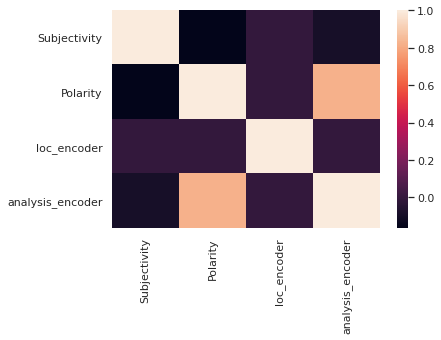

In [ ]:
sns.heatmap(df2.corr())